# Filtering Random Signals (MA Model)

In [1]:
import numpy as np
from numpy.random import default_rng
import scipy.signal as sig
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as stools
import statsmodels.tsa.arima_process as arima
plt.rcParams["figure.figsize"] = (8,5)
rng = default_rng()

Create a random signal (white Gaussian noise) and filter it with a moving-average filter.

First part is for demonstration only.

In [2]:
u = rng.standard_normal(30)

<StemContainer object of 3 artists>

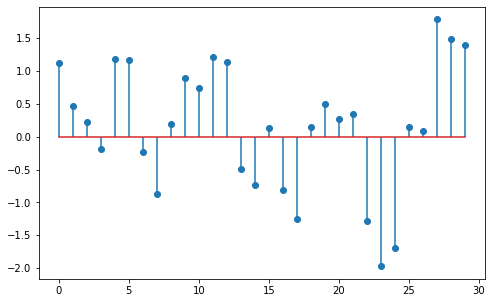

In [3]:
a = [1]
b = [1, 0.6, 0.2]

y = sig.lfilter(b,a,u)
plt.stem(y)

Now we calculate the analytical solution. The ACF of $y[n]$ is denoted by $r_y[n]$ and is given by

$$
r_y[n] = r_u([n] \star h[n] \star h[-n]
$$

where $r_u[n]$ denotes the ACF of the input signal $u[n]$ of the filter. We have white noise => $r_u[n] = \delta[n]$ and therefore

$$
r_y[n] = h[n] \star h[-n]
$$


In [4]:
brev = b[::-1] # reverse the filter impulse response
acf_x = sig.convolve(b, brev) # and convolve with original
acf_x

array([0.2 , 0.72, 1.4 , 0.72, 0.2 ])

Now we estimate the ACF from the output signal itself. Careful, `statsmodel` estimates the ACF normalized to $1$.

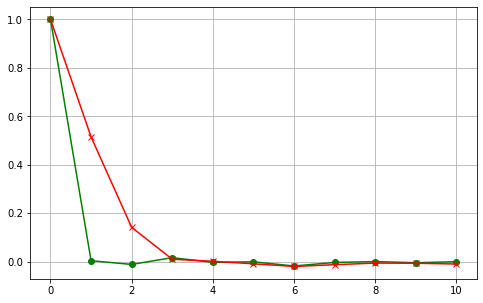

In [5]:
u = rng.standard_normal(10000)
yma = sig.lfilter(b,a,u)

acf_u = stools.acf(u, nlags=10, fft=False)
acf_x = stools.acf(yma, nlags=10, fft=False)

plt.plot(acf_u, '-go', acf_x, '-rx')
plt.grid()

In [6]:
1.4*acf_x

array([ 1.4       ,  0.72101279,  0.19854713,  0.01434454,  0.00244285,
       -0.01217557, -0.02730617, -0.01724369, -0.00785371, -0.00883684,
       -0.01331112])

We can also calculate the ACF from the coefficients (I assume statsmodel does nothing different than $r_y[n] = h[n] \star h[-n]$).

In [8]:
1.4*arima.arma_acf(a, b)

array([1.4 , 0.72, 0.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [10]:
arima.arma_impulse_response(a,b)

array([1. , 0.6, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])